# 2. Import & Read Data

## 2.1. Install Packages

## 2.2. Import Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette(["#30a2da", "#fc4f30", "#e5ae38", "#6d904f", "#8b8b8b"])

## 2.3.  Read Data

Three datafiles are used for this study: 

1.   Season.csv : player stats per season
2.   Team.csv : team record per season
3.   mvp.csv : MVP votes per season


In [0]:
def readFile(file_id):
  link='https://drive.google.com/uc?export=download&id={FILE_ID}'
  csv_url=link.format(FILE_ID=file_id)
  df = pd.read_csv(csv_url, encoding='latin-1')
  return df

In [0]:
season_id = '1xiT1X8iNYq_x5mMhA3GtoP4bI-9o471v'
team_id = '1SIk4C68ifJHua0umsWpvMmvmbSYVu-oa'
mvp_id = '1DiZb-_SbwgvyZiKTGYfABI6FChPLV6jg'

season = readFile(season_id)
team = readFile(team_id)
mvp = readFile(mvp_id)

# 3. Data Exploration

## 3.1. Understanding the Raw Dataset

In [4]:
season.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [5]:
team.head()

,Rk,Team,Season,Total,Win,Loss,Home,Road,E,W,Pre,Post,3,10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
0,1,BOS,1980,82,61,21,35+6,26+15,45+15,16+6,40+13,21+8,8+7,34+5,7+2,10+2,12+5,11+4,9+2,12+6,NaN
1,2,LAL,1980,82,60,22,37+4,23+18,18+4,42+18,38+17,22+5,11+5,29+6,7+3,9+6,12+4,10+4,9+2,13+3,NaN
2,3,PHI,1980,82,59,23,36+5,23+18,44+16,15+7,38+14,21+9,17+3,24+8,8+1,10+6,9+4,11+3,10+3,11+6,NaN
3,4,SEA,1980,82,56,26,33+8,23+18,17+5,39+21,38+16,18+10,10+6,25+7,5+5,11+2,11+4,11+5,9+4,9+6,NaN
4,5,PHO,1980,82,55,27,37+5,18+22,13+9,42+18,35+19,20+8,10+4,27+12,7+4,9+5,10+5,9+5,8+5,12+3,NaN


In [6]:
mvp.head()

,Rank,Player,YearFrom,YearTo,Age,Team,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Kareem Abdul-Jabbar,1979,1980,32,LAL,147.0,147.0,221,0.665,82,38.3,24.8,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227
1,2,Julius Erving,1979,1980,29,PHI,31.5,31.5,221,0.143,78,36.1,26.9,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213
2,3,George Gervin,1979,1980,27,SAS,19.0,19.0,221,0.086,78,37.6,33.1,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173
3,4,Larry Bird,1979,1980,23,BOS,15.0,15.0,221,0.068,82,36.0,21.3,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182
4,5,Tiny Archibald,1979,1980,31,BOS,2.0,2.0,221,0.009,80,35.8,14.1,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148


We can join three dataframes on player name, season and team, which makes it easier for future analysis.

## 3.2. Data cleaning

### 3.2.1. Season

In [7]:
season.isna().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             163
3PAr           5862
FTr             176
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5119
USG%           5051
blanl         26063
OWS             106
DWS             106
WS              106
WS/48           590
blank2        26063
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             176
3P             5764
3PA            5764
3P%            9387
2P               67
2PA              67
2P%             228
eFG%            176
FT               67
FTA              67
FT%            1026
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [0]:
# Remove meaningless columns
season_clean = season.drop(['Unnamed: 0', 'blanl','blank2'], axis=1)

# Drop invalid data entries
season_clean.dropna(how='all', inplace=True)

# Only use data after year 1980
season_clean.astype({'Year':'int64'}, copy=False)
season_clean = season_clean[season_clean['Year'] >= 1980]

# Minimum minutes played: 100 mins
season_clean = season_clean[season_clean['MP'] >= 100]

# Remaining missing data are from GS/3P%/FT%. Fill other missing data with zero, which means non-existence. 
season_clean.fillna(value=0, inplace=True)

In [9]:
season_clean.shape

(17667, 50)

### 3.2.2. Team

In [10]:
team.head()

,Rk,Team,Season,Total,Win,Loss,Home,Road,E,W,Pre,Post,3,10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
0,1,BOS,1980,82,61,21,35+6,26+15,45+15,16+6,40+13,21+8,8+7,34+5,7+2,10+2,12+5,11+4,9+2,12+6,NaN
1,2,LAL,1980,82,60,22,37+4,23+18,18+4,42+18,38+17,22+5,11+5,29+6,7+3,9+6,12+4,10+4,9+2,13+3,NaN
2,3,PHI,1980,82,59,23,36+5,23+18,44+16,15+7,38+14,21+9,17+3,24+8,8+1,10+6,9+4,11+3,10+3,11+6,NaN
3,4,SEA,1980,82,56,26,33+8,23+18,17+5,39+21,38+16,18+10,10+6,25+7,5+5,11+2,11+4,11+5,9+4,9+6,NaN
4,5,PHO,1980,82,55,27,37+5,18+22,13+9,42+18,35+19,20+8,10+4,27+12,7+4,9+5,10+5,9+5,8+5,12+3,NaN


In [0]:
# Rename Rk to Seed
team_clean = team.rename(columns={'Rk':'Seed'})

# Scale Win&Loss to 82 games for lockout seasons.
team_clean['Win'] = 82*team_clean['Win']/team_clean['Total']
team_clean['Loss'] = 82*team_clean['Loss']/team_clean['Total']

# Only consider overall seeding and win-loss record
columns_to_select = ['Seed', 'Team', 'Season', 'Win', 'Loss']
team_clean = team_clean[columns_to_select]

In [12]:
team_clean.shape

(1104, 5)

### 3.2.3. MVP Votes

In [13]:
mvp.head()

,Rank,Player,YearFrom,YearTo,Age,Team,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Kareem Abdul-Jabbar,1979,1980,32,LAL,147.0,147.0,221,0.665,82,38.3,24.8,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227
1,2,Julius Erving,1979,1980,29,PHI,31.5,31.5,221,0.143,78,36.1,26.9,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213
2,3,George Gervin,1979,1980,27,SAS,19.0,19.0,221,0.086,78,37.6,33.1,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173
3,4,Larry Bird,1979,1980,23,BOS,15.0,15.0,221,0.068,82,36.0,21.3,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182
4,5,Tiny Archibald,1979,1980,31,BOS,2.0,2.0,221,0.009,80,35.8,14.1,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148


Share is the points divided by the maximum points possible. Higher share value means higher chance to be a MVP. It is safe to say that players with any MVP points is better than a player with no points at all. And the difference is bigger than the gap between an  unanimous MVP and a player with 1 mvp point. To account for the difference, I'm using a new metric: MVP Rating.


**MVP Rating = Share + 1 for player with mvp points. **

MVP rating is also what we will predict with our model.

In [0]:
# MVP Rating
mvp['MVPR'] = 1 + mvp['Share']

# Only consider MVP Rating
columns_to_select = ['Player', 'YearTo', 'MVPR']
mvp_clean = mvp[columns_to_select]

# Rename the column names.
mvp_clean = mvp_clean.rename(columns={'YearTo':'Season'})

In [15]:
mvp_clean.head()

,Player,Season,MVPR
0,Kareem Abdul-Jabbar,1980,1.665
1,Julius Erving,1980,1.143
2,George Gervin,1980,1.086
3,Larry Bird,1980,1.068
4,Tiny Archibald,1980,1.009


### 3.2.3. Join dataframes

In [0]:
temp = season_clean.merge(team_clean, how='left', left_on=['Year', 'Tm'], right_on=['Season', 'Team'])
df = temp.merge(mvp_clean, how='left', left_on=['Player', 'Year'], right_on=['Player', 'Season'])

In [17]:
df.shape

(17668, 57)

## 3.3. Missing Values

In [18]:
df.isna().sum()

Year            0
Player          0
Pos             0
Age             0
Tm              0
G               0
GS              0
MP              0
PER             0
TS%             0
3PAr            0
FTr             0
ORB%            0
DRB%            0
TRB%            0
AST%            0
STL%            0
BLK%            0
TOV%            0
USG%            0
OWS             0
DWS             0
WS              0
WS/48           0
OBPM            0
DBPM            0
BPM             0
VORP            0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%             0
2P              0
2PA             0
2P%             0
eFG%            0
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
Seed         1616
Team         1616
Season_x     1616
Win          1616
Loss         1616
Season_y  

In [19]:
df[df['Seed'].isna()].Tm.unique()

array(['TOT'], dtype=object)

If Tm = 'TOT', it means the player switched team during the season. This will create multiple entries for the same player in the same year. In this case, we choose to keep the total stats (TOT) and fill the missing Seed/Win/Loss with median value since total record with various teams for one player is not available in this datasheet. 

In [0]:
# Drop the duplicated data entries. Only keep the total year entry per player.
df.drop_duplicates(subset=['Player', 'Year'], keep='first', inplace=True)
                   
# Fill the missing values in Seed, Win and Loss with median value.
df['Seed'].fillna(value=df['Seed'].median(), inplace=True)
df['Win'].fillna(value=df['Win'].median(), inplace=True)
df['Loss'].fillna(value=df['Loss'].median(), inplace=True)

# Fill the missing value in MVPR with zero since the player does not have MVP votes.
df['MVPR'].fillna(value=0, inplace=True)

# 4. Feature Engineering

## 4.1. Initial Selection

Based on my understanding of basketball, some of the features are not directly related to MVP selection. Thus they are removed from the features used, 

In [0]:
# Remove unrelated features.
columns_to_drop = ['Pos', 'Age', 'GS', 'Tm', 'Season_x', 'Season_y', 'Team']

# Between eFG% and TS%, we choose to use TS%.
columns_to_drop.append('eFG%')

# For features includes both offense and defense values, keep the total value.
columns_to_drop.extend(['OBPM', 'DBPM', 'ORB', 'DRB', 'OWS', 'DWS'])

# For shooting data, FG = FGA*FG%. So we can just keep two of them and does not lose any information.
columns_to_drop.extend(['FG', '3P', '2P', 'FT'])

# Win + Loss = 82 so we can remove Loss.
columns_to_drop.append('Loss')



df = df.drop(columns_to_drop, axis=1)


In [0]:
# For basic stats, per game values are used instead of total value. 
columns = ['MP', 'FGA', '3PA', '2PA', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

for column in columns:
  df[column] = df[column]/df['G']

## 4.2. Feature selection
In this selction, we use three approaches to identify the importance of features. 

In [23]:
df.head()

,Year,Player,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,WS/48,BPM,VORP,FGA,FG%,3PA,3P%,2PA,2P%,FTA,FT%,TRB,AST,STL,BLK,TOV,PF,PTS,Seed,Win,MVPR
0,1980.0,Kareem Abdul-Jabbar,82.0,38.329268,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,14.8,0.227,6.7,6.8,16.865854,0.604,0.012195,0.000,16.853659,0.604,5.804878,0.765,10.804878,4.524390,0.987805,3.414634,3.621951,2.634146,24.804878,2.0,60.0,1.665
1,1980.0,Tom Abernethy,67.0,18.238806,11.0,0.511,0.003,0.258,5.4,12.0,8.6,9.3,1.4,0.6,9.9,13.3,2.0,0.080,-1.6,0.1,4.746269,0.481,0.014925,0.000,4.731343,0.483,1.223881,0.683,2.850746,1.298507,0.522388,0.179104,0.582090,1.761194,5.402985,20.0,24.0,0.000
2,1980.0,Alvan Adams,75.0,28.906667,19.2,0.571,0.002,0.270,8.2,22.4,15.4,21.6,2.3,1.4,18.2,21.9,7.0,0.155,4.4,3.5,11.666667,0.531,0.026667,0.000,11.640000,0.533,3.146667,0.797,8.120000,4.293333,1.440000,0.733333,2.906667,3.160000,14.906667,5.0,55.0,0.000
3,1980.0,Tiny Archibald,80.0,35.800000,15.3,0.574,0.023,0.548,2.3,5.3,3.8,30.2,1.7,0.2,19.7,17.0,8.9,0.148,0.0,1.5,9.925000,0.482,0.225000,0.222,9.700000,0.488,5.437500,0.830,2.462500,8.387500,1.325000,0.125000,3.025000,2.725000,14.137500,1.0,61.0,1.009
4,1980.0,Dennis Awtrey,26.0,21.538462,7.4,0.524,0.000,0.833,6.0,16.9,11.5,9.0,1.0,1.5,24.8,7.9,0.6,0.053,-1.4,0.1,2.307692,0.450,0.000000,0.000,2.307692,0.450,1.923077,0.640,4.423077,1.538462,0.461538,0.576923,1.038462,2.538462,3.307692,18.0,30.0,0.000


In [0]:
# Split the training and validation dataset. All the feature selection process should be performed on the training dataset and applied to validation dataset.
# Use the most recent 10 years data as training set (2009 - 2018)
to_drop = ['Player', 'MVPR']

df_test = df[df['Year'] == 2019]
X_test = df_test.drop(to_drop, axis=1)
y_test = df_test['MVPR']

df_train = df[df['Year'] < 2019]
X_train = df_train.drop(to_drop, axis=1)
y_train = df_train['MVPR']

### 4.2.1. Correlation Matrix

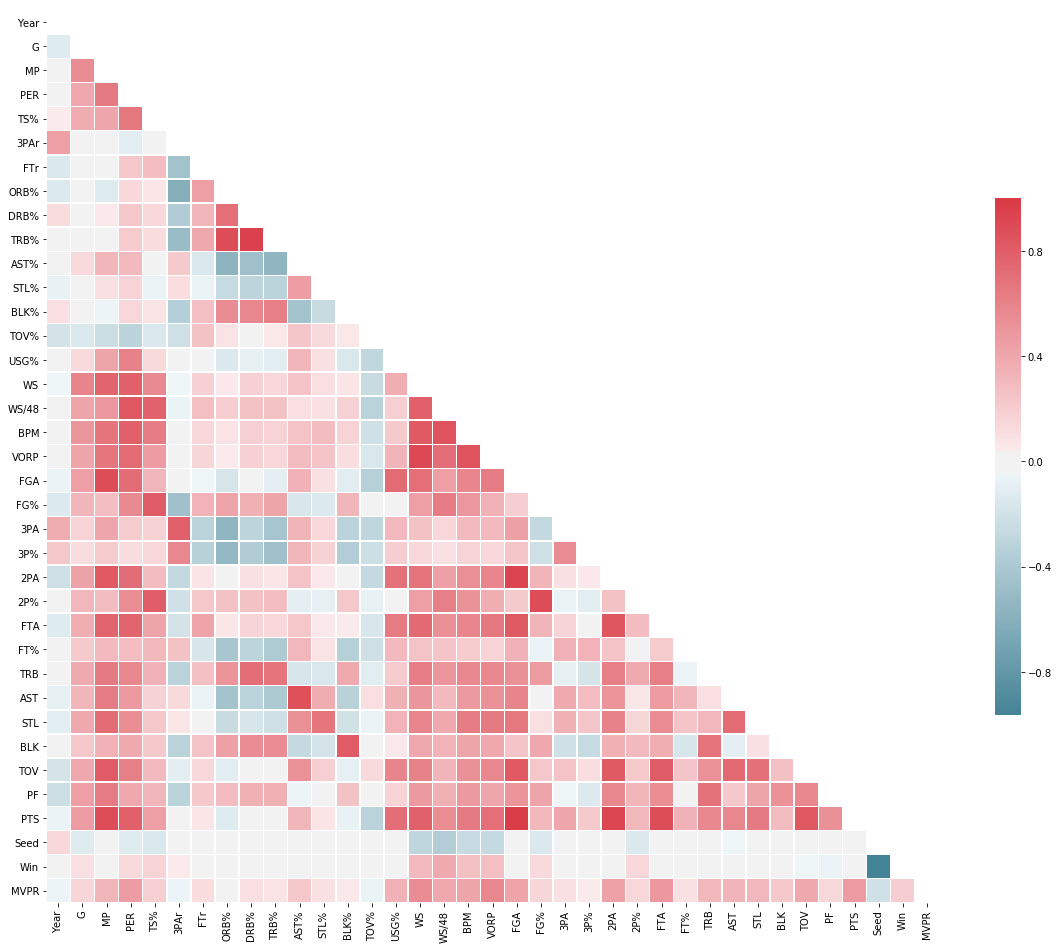

In [25]:
corr = df_train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 19))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
corr_target = corr['MVPR']
corr_target.sort_values(ascending=False)

MVPR     1.000000
VORP     0.585711
WS       0.550840
FTA      0.492750
PTS      0.469194
PER      0.458964
2PA      0.425394
FGA      0.420430
BPM      0.412309
TOV      0.397504
WS/48    0.387556
USG%     0.345182
AST      0.329093
MP       0.320929
STL      0.317333
TRB      0.304944
BLK      0.221424
AST%     0.220586
Win      0.198896
TS%      0.187810
G        0.154839
FG%      0.152039
2P%      0.148961
PF       0.147020
FTr      0.120586
DRB%     0.106284
3PA      0.102267
STL%     0.098161
FT%      0.088260
TRB%     0.081461
BLK%     0.053173
3P%      0.042514
ORB%     0.016333
3PAr    -0.050289
Year    -0.055011
TOV%    -0.061070
Seed    -0.205190
Name: MVPR, dtype: float64

### 4.2.2. Feature Selection from sklearn

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X_train, y_train)

# Extract the scores
score = fit.scores_

# Display feature and its score
features = X_train.columns.values
feature_importance = pd.DataFrame(np.vstack((features, score))).T
feature_importance = feature_importance.rename(columns={0:'Feature', 1:'Importance'}).sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
15,WS,0.116608
18,VORP,0.116113
3,PER,0.104398
17,BPM,0.0974932
16,WS/48,0.0965802
33,PTS,0.0961818
25,FTA,0.0817794
23,2PA,0.0805613
19,FGA,0.0777624
2,MP,0.0761281


### 4.2.3. Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

classifier_RF = RandomForestRegressor()
classifier_RF.fit(X_train, y_train)

score_RF = classifier_RF.feature_importances_

feature_importance_RF = pd.DataFrame(np.vstack((features, score_RF))).T
feature_importance_RF = feature_importance.rename(columns={0:'Feature', 1:'Importance'}).sort_values(by='Importance', ascending=False)
feature_importance_RF

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Feature,Importance
15,WS,0.116608
18,VORP,0.116113
3,PER,0.104398
17,BPM,0.0974932
16,WS/48,0.0965802
33,PTS,0.0961818
25,FTA,0.0817794
23,2PA,0.0805613
19,FGA,0.0777624
2,MP,0.0761281


### 4.2.4. Result
Based on the three methods above, we choose the following features to feed into the model:


*   Player basic stats: PTS, TRB, AST, STL, BLK, TOV, MP, FGA, FTA, G
*   Player advanced stats: WS, WS/48, PER, VORP, BPM, TS%, USG%
*   Team stats: Win



In [0]:
to_use = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'MP', 'FGA', 'FTA', 'WS', 'WS/48', 'PER', 'VORP', 'BPM', 'TS%', 'USG%', 'Win'] 

X_train = X_train.loc[:, to_use]
X_test = X_test.loc[:, to_use]

# 5. Model Training and Result Evaluation

## 5.1. Benchmark

In [0]:
# Scale the data, using standardization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [0]:
# Baseline model using Ridge Regression
from sklearn.linear_model import Ridge

result = df_test.loc[:, ['Player', 'MVPR']]

regressor_ridge = Ridge()
regressor_ridge.fit(X_train_std, y_train)
result['Benchmark'] = regressor_ridge.predict(X_test_std)

In [0]:
df1 = result[['Player', 'MVPR']].sort_values(by=['MVPR'], axis=0, ascending=False).head(10)
df2 = result[['Player', 'Benchmark']].sort_values(by=['Benchmark'], axis=0, ascending=False).head(20)

In [33]:
result.sort_values(by=['MVPR'], axis=0, ascending=False).head(12)

,Player,MVPR,Benchmark
17082,Giannis Antetokounmpo,1.932,1.033959
17297,James Harden,1.768,1.315263
17273,Paul George,1.352,0.711782
17367,Nikola Jokic,1.210,0.786191
17207,Stephen Curry,1.173,0.597987
17412,Damian Lillard,1.068,0.738341
17240,Joel Embiid,1.049,0.694189
17234,Kevin Durant,1.025,0.668957
17408,Kawhi Leonard,1.013,0.513203
17642,Russell Westbrook,1.008,0.770370


In [34]:
print('R^2 score of benchmark linear regression model is: %.3f'%regressor_ridge.score(X_test_std, y_test))

R^2 score of benchmark linear regression model is: 0.392


## 5.2. Model Training and Selection

SVM, Random Forest, GBT, KNN

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

regressor_GDB = GradientBoostingRegressor()
regressor_RF = RandomForestRegressor()
regressor_SVM = SVR()
regressor_KNN = KNeighborsRegressor()


regressor_GDB.fit(X_train_std, y_train)
result['GDB'] = regressor_GDB.predict(X_test_std)
regressor_GDB.score(X_test_std, y_test)


0.8146829111350892

In [0]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [37]:
from sklearn.metrics import mean_squared_error, make_scorer

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# GDB
parameters = {
    'learning_rate':(0.01, 0.05, 0.1),
    'n_estimators':(50, 100, 200),
    
}
Grid_GDB = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5) # scoring=mse_scorer
Grid_GDB.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [38]:
best_GDB_model = Grid_GDB.best_estimator_
print_grid_search_metrics(Grid_GDB)
result['GDB'] = best_GDB_model.predict(X_test_std)

Best score: 0.687
Best parameters set:
	learning_rate: 0.05
	n_estimators: 200


In [39]:
# Random Forest
parameters = {
    'n_estimators':(50, 100, 200),
}
Grid_RF= GridSearchCV(RandomForestRegressor(), parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': (50, 100, 200)}

In [40]:
best_RF_model = Grid_RF.best_estimator_
print_grid_search_metrics(Grid_RF)
result['RF'] = best_RF_model.predict(X_test)

Best score: 0.678
Best parameters set:
	n_estimators: 200


In [41]:
# SVM
parameters = {
    'kernel':('sigmoid', 'rbf', 'linear'),
    'C':(0.1, 0.5, 1)
}
Grid_SVR= GridSearchCV(SVR(), parameters, cv=5)
Grid_SVR.fit(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (0.1, 0.5, 1),
                         'kernel': ('sigmoid', 'rbf', 'linear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
best_SVR_model = Grid_SVR.best_estimator_
print_grid_search_metrics(Grid_SVR)
result['SVR'] = best_SVR_model.predict(X_test_std)

Best score: 0.578
Best parameters set:
	C: 1
	kernel: 'rbf'


In [43]:
# KNN
parameters = {
    'n_neighbors':(3, 5, 10),
    'weights':('uniform', 'distance'),
}
Grid_KNN= GridSearchCV(KNeighborsRegressor(), parameters, cv=5)
Grid_KNN.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': (3, 5, 10),
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
best_KNN_model = Grid_KNN.best_estimator_
print_grid_search_metrics(Grid_KNN)
result['KNN'] = best_KNN_model.predict(X_test_std)

Best score: 0.661
Best parameters set:
	n_neighbors: 10
	weights: 'uniform'


In [45]:
result.sort_values(by=['MVPR'], axis=0, ascending=False).head(12)

,Player,MVPR,Benchmark,GDB,RF,SVR,KNN
17082,Giannis Antetokounmpo,1.932,1.033959,1.603778,1.642040,1.526400,1.4997
17297,James Harden,1.768,1.315263,1.731523,1.639710,2.030320,1.6997
17273,Paul George,1.352,0.711782,1.041222,1.060095,0.742200,0.9549
17367,Nikola Jokic,1.210,0.786191,1.046044,0.979209,0.770102,1.1904
17207,Stephen Curry,1.173,0.597987,1.059321,0.761225,0.603288,0.7004
17412,Damian Lillard,1.068,0.738341,1.184582,1.110855,0.674751,0.8948
17240,Joel Embiid,1.049,0.694189,1.012891,0.922385,0.860844,0.9924
17234,Kevin Durant,1.025,0.668957,1.114193,1.147475,0.657277,1.0909
17408,Kawhi Leonard,1.013,0.513203,1.035149,0.707415,0.625430,0.9544
17642,Russell Westbrook,1.008,0.770370,0.804590,0.747220,0.755167,0.8726


# 6. Neural Network

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


In [47]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (14505, 17)
y_train original shape (14505,)
X_test original shape (461, 17)
y_test original shape (461,)


In [48]:
# Define the keras model
model = Sequential()

# Input layer
model.add(Dense(32, kernel_initializer='normal', input_dim=17, activation='relu'))

# Hidden layer
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

model.summary()

W0807 21:14:04.257236 140531696973696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 21:14:04.315628 140531696973696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 21:14:04.323761 140531696973696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0807 21:14:04.382505 140531696973696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 21:14:04.402312 140531696973696 deprecation_wra

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                576       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Define a checkpint callback
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [50]:
# Fit the keras model on the dataset
model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.2, callbacks=callbacks_list)

W0807 21:14:04.657199 140531696973696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 11604 samples, validate on 2901 samples
Epoch 1/50
11604/11604 [==============================] - 1s 86us/step - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0169 - val_mean_squared_error: 0.0169

Epoch 00001: val_loss improved from inf to 0.01694, saving model to Weights-001--0.01694.hdf5
Epoch 2/50
11604/11604 [==============================] - 0s 26us/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0154 - val_mean_squared_error: 0.0154

Epoch 00002: val_loss improved from 0.01694 to 0.01542, saving model to Weights-002--0.01542.hdf5
Epoch 3/50
11604/11604 [==============================] - 0s 24us/step - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0143 - val_mean_squared_error: 0.0143

Epoch 00003: val_loss improved from 0.01542 to 0.01435, saving model to Weights-003--0.01435.hdf5
Epoch 4/50
11604/11604 [==============================] - 0s 24us/step - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0160 - val_mean_squared_erro

In [51]:
result['NN'] = model.predict(X_test)
result.sort_values(by=['NN'], axis=0, ascending=False).head(12)

,Player,MVPR,Benchmark,GDB,RF,SVR,KNN,NN
17297,James Harden,1.768,1.315263,1.731523,1.639710,2.030320,1.6997,2.108165
17082,Giannis Antetokounmpo,1.932,1.033959,1.603778,1.642040,1.526400,1.4997,1.995144
17367,Nikola Jokic,1.210,0.786191,1.046044,0.979209,0.770102,1.1904,1.400276
17642,Russell Westbrook,1.008,0.770370,0.804590,0.747220,0.755167,0.8726,1.388054
17240,Joel Embiid,1.049,0.694189,1.012891,0.922385,0.860844,0.9924,1.294745
17234,Kevin Durant,1.025,0.668957,1.114193,1.147475,0.657277,1.0909,1.200384
17412,Damian Lillard,1.068,0.738341,1.184582,1.110855,0.674751,0.8948,1.156210
17207,Stephen Curry,1.173,0.597987,1.059321,0.761225,0.603288,0.7004,1.118118
17273,Paul George,1.352,0.711782,1.041222,1.060095,0.742200,0.9549,1.113948
17408,Kawhi Leonard,1.013,0.513203,1.035149,0.707415,0.625430,0.9544,0.967182
